In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fantasy-football/master_team_list.csv
/kaggle/input/fantasy-football/cleaned_merged_seasons.csv


## Data Loading and Cleaning

In this section, we load the Fantasy Premier League (FPL) dataset and perform the necessary cleaning steps to prepare it for analysis.  
Key operations include handling missing values, converting data types, and ensuring consistency across player, team, and fixture information.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')

/tmp/ipykernel_37/56455962.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')


In [4]:
df.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [11]:
df.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [12]:
print(len(df[df['round']!=df['GW']]))

0


In [21]:
name_to_id_map = df.groupby('opp_team_name')['opponent_team'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
).to_dict()

fixture_groups = df.groupby(['season_x', 'GW', 'fixture'])['opp_team_name'].unique()

fixture_df = fixture_groups.apply(lambda x: pd.Series(x[:2]))
fixture_df = fixture_df.rename(columns={0: 'team_1_name', 1: 'team_2_name'}).reset_index()

final_columns = [
    'season_x',
    'GW',
    'fixture',
    'team_1_name',
    'team_2_name',
    # 'team_1_id',
    # 'team_2_id'
]
fixture_df = fixture_df[final_columns]

In [22]:
fixture_df.head(20)

,season_x,GW,fixture,team_1_name,team_2_name
0,2016-17,1,1,Swansea,Burnley
1,2016-17,1,2,West Brom,Crystal Palace
2,2016-17,1,3,Spurs,Everton
3,2016-17,1,4,Leicester,Hull
4,2016-17,1,5,Sunderland,Man City
5,2016-17,1,6,Stoke,Middlesbrough
6,2016-17,1,7,Southampton,Watford
7,2016-17,1,8,Liverpool,Arsenal
8,2016-17,1,9,Man Utd,Bournemouth
9,2016-17,1,10,Chelsea,West Ham


In [28]:
df_merged = df.merge(
    fixture_df[['fixture', 'team_1_name', 'team_2_name', 'GW', 'season_x']],
    on=['fixture', 'GW', 'season_x'],
    how='left'
)
df_merged.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team_1_name,team_2_name
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,0,0,0,0,55,False,0,1,Chelsea,West Ham
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1,0,0,0,60,True,0,1,Spurs,Everton
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,2,0,0,0,80,True,0,1,Liverpool,Arsenal
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,0,0,0,0,50,False,0,1,Southampton,Watford
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1,0,0,0,45,True,1,1,Stoke,Middlesbrough


In [30]:
# 2. Define the Conditional Fill Logic
def fill_missing_team_by_fixture(row):
    # If team_x is already present, return it.
    if pd.notna(row['team_x']):
        return row['team_x']

    # Identify the opponent name
    opponent = row['opp_team_name']

    # The missing team must be the non-opponent team among the two fixture teams (team_1_name and team_2_name)
    if row['team_1_name'] == opponent:
        # If team 1 is the opponent, the player's team is team 2
        return row['team_2_name']
    elif row['team_2_name'] == opponent:
        # If team 2 is the opponent, the player's team is team 1
        return row['team_1_name']
    else:
        # Fallback if names don't match
        return row['team_x']

In [33]:
# 3. Apply the fill logic
df_merged['team_x_fixed'] = df_merged.apply(fill_missing_team_by_fixture, axis=1)
# 4. Finalize the 'team_x' column by filling NaNs with the derived values
df_merged['team_x'] = df_merged['team_x'].fillna(df_merged['team_x_fixed'])

In [36]:
# 5. Clean up temporary columns and prepare final DataFrame
df_final = df_merged.drop(columns=['team_1_name', 'team_2_name', 'team_x_fixed'])

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             96169 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [41]:
cleaned_df = df_final.drop(['round', 'bps', 'creativity', 'influence' ,'threat', 'kickoff_time'], axis=1)
cleaned_df.head(5)

,season_x,name,position,team_x,assists,bonus,clean_sheets,element,fixture,goals_conceded,...,team_a_score,team_h_score,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,454,10,0,...,1.0,2.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,Everton,0,0,0,142,3,0,...,1.0,1.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,Arsenal,0,0,0,16,8,3,...,4.0,3.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,Watford,0,0,0,482,7,0,...,1.0,1.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,Middlesbrough,0,0,0,286,6,1,...,1.0,1.0,1,0,0,0,45,True,1,1


In [42]:
# Shows the actual duplicated rows
cleaned_df[cleaned_df.duplicated()]

,season_x,name,position,team_x,assists,bonus,clean_sheets,element,fixture,goals_conceded,...,team_a_score,team_h_score,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW


In [43]:
cleaned_df.rename(columns={
    'total_points': 'GW_points',
    'element': 'player_id',
}, inplace=True)
cleaned_df.head()

,season_x,name,position,team_x,assists,bonus,clean_sheets,player_id,fixture,goals_conceded,...,team_a_score,team_h_score,GW_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,454,10,0,...,1.0,2.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,Everton,0,0,0,142,3,0,...,1.0,1.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,Arsenal,0,0,0,16,8,3,...,4.0,3.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,Watford,0,0,0,482,7,0,...,1.0,1.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,Middlesbrough,0,0,0,286,6,1,...,1.0,1.0,1,0,0,0,45,True,1,1


In [72]:
cleaned_df.rename(columns={
    'season_x': 'season',
    'team_x': 'team',
}, inplace=True)

In [63]:
cleaned_df['GW'] = cleaned_df['GW'].astype(int)
cleaned_df.sort_values(by=['season', 'player_id', 'GW'], inplace=True)
cleaned_df.head(10)

,season_x,name,position,team_x,assists,bonus,clean_sheets,player_id,fixture,goals_conceded,...,team_a_score,team_h_score,GW_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
75,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,8,4,...,4.0,3.0,0,0,0,0,65,True,0,1
2480,2016-17,Héctor Bellerín,DEF,Arsenal,0,3,1,6,13,0,...,0.0,0.0,9,-56304,4952,61256,65,False,0,2
4816,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,28,1,...,3.0,1.0,2,-14824,23529,38353,65,False,0,3
7366,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,31,1,...,1.0,2.0,2,-22447,29018,51465,65,True,0,4
7579,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,43,1,...,4.0,1.0,2,-34253,6258,40511,65,False,0,5
7792,2016-17,Héctor Bellerín,DEF,Arsenal,1,2,1,6,51,0,...,0.0,3.0,11,-64440,5049,69489,65,True,0,6
8005,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,1,6,61,0,...,1.0,0.0,6,50025,63674,13649,65,False,0,7
8219,2016-17,Héctor Bellerín,DEF,Arsenal,1,0,0,6,71,2,...,2.0,3.0,4,15926,36844,20918,65,True,0,8
8434,2016-17,Héctor Bellerín,DEF,Arsenal,0,1,1,6,81,0,...,0.0,0.0,7,39161,50283,11122,66,True,0,9
280,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,97,1,...,4.0,1.0,2,25971,31412,5441,66,False,0,10


In [65]:
cleaned_df['total_points'] = cleaned_df.groupby(['season', 'player_id'])['GW_points'].cumsum()

In [68]:
cleaned_df[cleaned_df['name'] == 'Héctor Bellerín']

,season_x,name,position,team_x,assists,bonus,clean_sheets,player_id,fixture,goals_conceded,...,team_h_score,GW_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total_points
75,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,8,4,...,3.0,0,0,0,0,65,True,0,1,0
2480,2016-17,Héctor Bellerín,DEF,Arsenal,0,3,1,6,13,0,...,0.0,9,-56304,4952,61256,65,False,0,2,9
4816,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,28,1,...,1.0,2,-14824,23529,38353,65,False,0,3,11
7366,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,31,1,...,2.0,2,-22447,29018,51465,65,True,0,4,13
7579,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,43,1,...,1.0,2,-34253,6258,40511,65,False,0,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66182,2021-22,Héctor Bellerín,DEF,Arsenal,0,0,0,9,349,0,...,1.0,0,-17,0,17,48,False,0,35,0
66990,2021-22,Héctor Bellerín,DEF,Arsenal,0,0,0,9,351,0,...,2.0,0,-22,0,22,48,True,0,36,0
66991,2021-22,Héctor Bellerín,DEF,Arsenal,0,0,0,9,218,0,...,3.0,0,-22,0,22,48,False,0,36,0
68914,2021-22,Héctor Bellerín,DEF,Arsenal,0,0,0,9,365,0,...,2.0,0,-28,0,28,48,False,0,37,0


In [122]:
cleaned_df.to_csv('cleaned_fpl.csv', index=False)

## Player Form and Points Overview

Here we explore player performance metrics such as **form** and **total points**.  
We analyze how these values are distributed across players and gameweeks, setting the foundation for identifying top performers during the 2022–23 season.

In [71]:
#adding the form column
cleaned_df['prev_total_points'] = cleaned_df.groupby(['season', 'player_id'])['GW_points'].shift(1)
cleaned_df['raw_form_score'] = cleaned_df.groupby(['season', 'player_id'])['prev_total_points'].rolling(
    window=4, 
    min_periods=1
).mean().reset_index(level=[0, 1], drop=True)

cleaned_df['form'] = cleaned_df['raw_form_score'].fillna(0) / 10
cleaned_df = cleaned_df.drop(columns=['prev_total_points', 'raw_form_score'])
cleaned_df.head(20)

,season_x,name,position,team_x,assists,bonus,clean_sheets,player_id,fixture,goals_conceded,...,GW_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total_points,form
75,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,8,4,...,0,0,0,0,65,True,0,1,0,0.000000
2480,2016-17,Héctor Bellerín,DEF,Arsenal,0,3,1,6,13,0,...,9,-56304,4952,61256,65,False,0,2,9,0.000000
4816,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,28,1,...,2,-14824,23529,38353,65,False,0,3,11,0.450000
7366,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,31,1,...,2,-22447,29018,51465,65,True,0,4,13,0.366667
7579,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,43,1,...,2,-34253,6258,40511,65,False,0,5,15,0.325000
7792,2016-17,Héctor Bellerín,DEF,Arsenal,1,2,1,6,51,0,...,11,-64440,5049,69489,65,True,0,6,26,0.375000
8005,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,1,6,61,0,...,6,50025,63674,13649,65,False,0,7,32,0.425000
8219,2016-17,Héctor Bellerín,DEF,Arsenal,1,0,0,6,71,2,...,4,15926,36844,20918,65,True,0,8,36,0.525000
8434,2016-17,Héctor Bellerín,DEF,Arsenal,0,1,1,6,81,0,...,7,39161,50283,11122,66,True,0,9,43,0.575000
280,2016-17,Héctor Bellerín,DEF,Arsenal,0,0,0,6,97,1,...,2,25971,31412,5441,66,False,0,10,45,0.700000


In [73]:
cleaned_df[cleaned_df['season']=='2017-18']

,season,name,position,team,assists,bonus,clean_sheets,player_id,fixture,goals_conceded,...,GW_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total_points,form
8671,2017-18,Héctor Bellerín,DEF,Arsenal,0,0,0,7,1,3,...,1,0,0,0,60,True,0,1,1,0.000000
11861,2017-18,Héctor Bellerín,DEF,Arsenal,0,0,0,7,16,1,...,2,-28590,14368,42958,60,False,0,2,3,0.100000
15170,2017-18,Héctor Bellerín,DEF,Arsenal,0,0,0,7,28,4,...,0,-67892,7781,75673,60,False,0,3,3,0.150000
18265,2017-18,Héctor Bellerín,DEF,Arsenal,0,0,1,7,31,0,...,6,-59067,13066,72133,59,True,0,4,9,0.100000
18545,2017-18,Héctor Bellerín,DEF,Arsenal,0,0,1,7,49,0,...,5,-30945,3865,34810,59,False,1,5,14,0.225000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17138,2017-18,Harvey Barnes,MID,Leicester,0,0,0,642,352,0,...,0,18,29,11,45,False,0,36,1,0.050000
17535,2017-18,Harvey Barnes,MID,Leicester,0,0,0,642,366,0,...,0,13,24,11,45,True,0,37,1,0.033333
17536,2017-18,Harvey Barnes,MID,Leicester,0,0,0,642,304,0,...,1,13,24,11,45,True,0,37,2,0.025000
17966,2017-18,Harvey Barnes,MID,Leicester,0,0,0,642,379,0,...,1,18,26,8,45,False,0,38,3,0.050000


## Position-Based Performance Analysis

This section examines how different player positions — Goalkeepers (GK), Defenders (DEF), Midfielders (MID), and Forwards (FWD) — perform across seasons.  
We visualize both **total points** and **average points per position**, highlighting trends and shifts in performance over time.


In [75]:
position_map = {
    'GKP': 0,
    'GK': 0,
    'DEF': 1,
    'MID': 2,
    'FWD': 3
}

was_home_map = {
    True: 1,
    False: 0
}

In [76]:
cleaned_df['position'] = cleaned_df['position'].map(position_map)
cleaned_df['was_home'] = cleaned_df['was_home'].map(was_home_map)

In [77]:
cleaned_df.head()

,season,name,position,team,assists,bonus,clean_sheets,player_id,fixture,goals_conceded,...,GW_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total_points,form
75,2016-17,Héctor Bellerín,1,Arsenal,0,0,0,6,8,4,...,0,0,0,0,65,1,0,1,0,0.000000
2480,2016-17,Héctor Bellerín,1,Arsenal,0,3,1,6,13,0,...,9,-56304,4952,61256,65,0,0,2,9,0.000000
4816,2016-17,Héctor Bellerín,1,Arsenal,0,0,0,6,28,1,...,2,-14824,23529,38353,65,0,0,3,11,0.450000
7366,2016-17,Héctor Bellerín,1,Arsenal,0,0,0,6,31,1,...,2,-22447,29018,51465,65,1,0,4,13,0.366667
7579,2016-17,Héctor Bellerín,1,Arsenal,0,0,0,6,43,1,...,2,-34253,6258,40511,65,0,0,5,15,0.325000


In [83]:
print(cleaned_df['position'].value_counts())

position
2    39163
1    33683
3    12669
0    10654
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

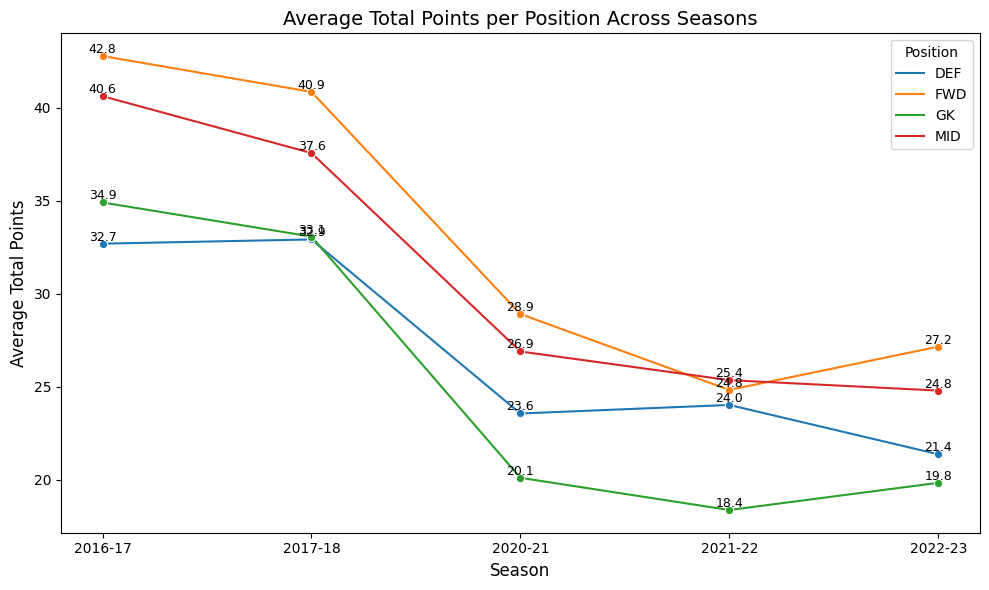

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

position_map = {
    'GKP': 0,
    'GK': 0,
    'DEF': 1,
    'MID': 2,
    'FWD': 3
}
inv_position_map = {v: k for k, v in position_map.items()}

cleaned_df['position_name'] = cleaned_df['position'].map(inv_position_map)

position_points = (
    cleaned_df.groupby(['season', 'position_name'])['total_points']
      .sum()
      .reset_index()
)

avg_points_per_season = (
    cleaned_df.groupby(['season', 'position_name'])['total_points']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=avg_points_per_season,
    x='season',
    y='total_points',
    hue='position_name',
    marker='o'
)

for position in avg_points_per_season['position_name'].unique():
    subset = avg_points_per_season[avg_points_per_season['position_name'] == position]
    for x, y in zip(subset['season'], subset['total_points']):
        ax.text(x, y, f"{y:.1f}", fontsize=9, ha='center', va='bottom')

plt.title('Average Total Points per Position Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Total Points', fontsize=12)
plt.legend(title='Position')
plt.tight_layout()
plt.show()

cleaned_df.drop('position_name', axis=1, inplace=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

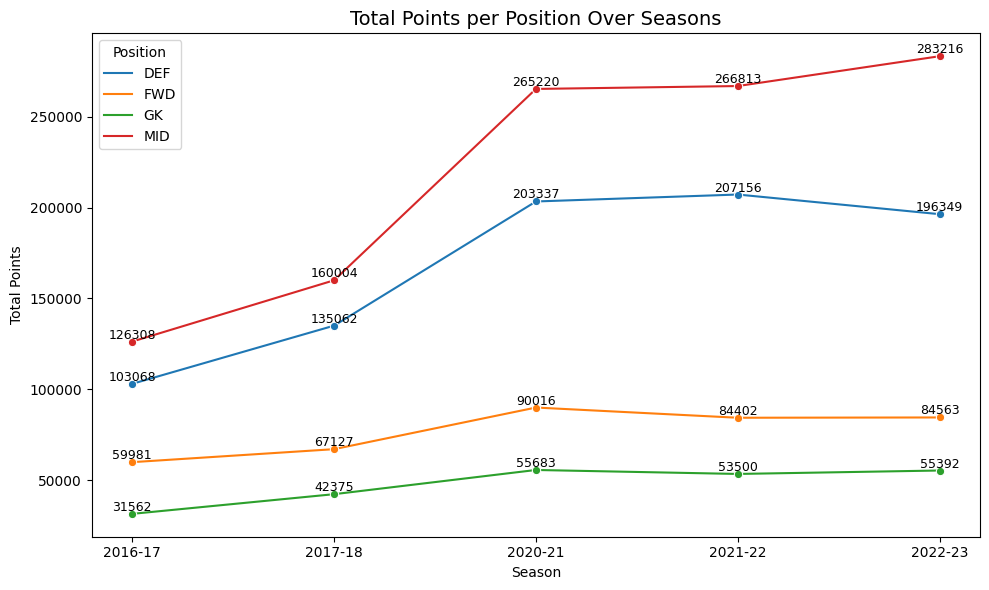

In [121]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=position_points,
    x='season',
    y='total_points',
    hue='position_name',
    marker='o'
)

for position in position_points['position_name'].unique():
    subset = position_points[position_points['position_name'] == position]
    for x, y in zip(subset['season'], subset['total_points']):
        ax.text(x, y, f"{y:.0f}", fontsize=9, ha='center', va='bottom')

plt.title('Total Points per Position Over Seasons', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Position')
plt.tight_layout()
plt.show()

## Top Player Evolution During 2022–23 Season

Here, we focus on the top five players who achieved the **highest form** and **highest points** in the 2022–23 FPL season.  
We track their performance progression across gameweeks to observe form fluctuations and identify consistent performers.

In [99]:
season_df = cleaned_df[cleaned_df['season'] == '2022-23'].copy()
season_df['form'] = pd.to_numeric(season_df['form'], errors='coerce')
top_forms_df = (
    season_df.groupby('name', as_index=False)['form']
    .max()
    .sort_values('form', ascending=False)
    .reset_index(drop=True)
)

top_forms_df.head(10)

,name,form
0,Fabian Schär,1.500000
1,Pascal Groß,1.500000
2,Erling Haaland,1.375000
3,Aleksandar Mitrović,1.300000
4,Dejan Kulusevski,1.300000
5,Kevin De Bruyne,1.225000
6,Lloyd Kelly,1.200000
7,Oleksandr Zinchenko,1.200000
8,Mohamed Salah,1.200000
9,Rodrigo Moreno,1.166667


In [100]:
top_players = (
    season_df.groupby('name')['form'].max()
    .reset_index()
    .sort_values('form', ascending=False)
    .drop_duplicates(subset=['name'])
    .head(5)
)

top_players_df = season_df[season_df['name'].isin(top_players['name'])]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

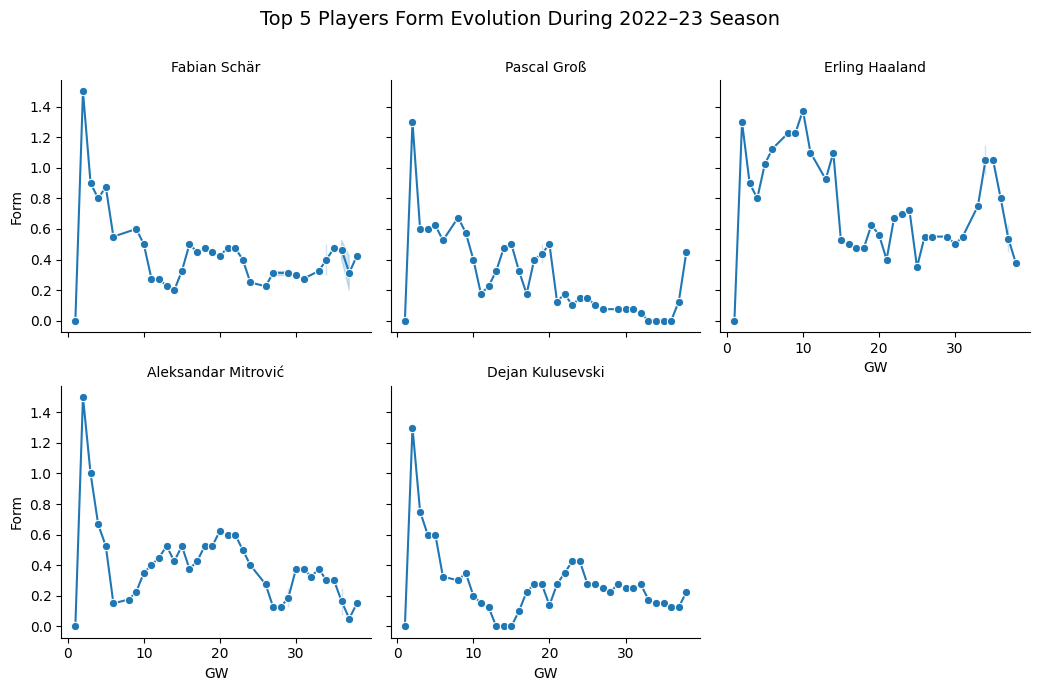

In [101]:
g = sns.FacetGrid(
    top_players_df,
    col='name',
    col_wrap=3,
    height=3.5,
    sharey=True,
    sharex=True
)
g.map_dataframe(sns.lineplot, x='GW', y='form', marker='o', color='#1f77b4')

for ax, name in zip(g.axes.flat, top_players['name']):
    player_data = top_players_df[top_players_df['name'] == name]
    # for x, y in zip(player_data['GW'], player_data['form']):
    #     ax.text(x, y, f"{y:.1f}", fontsize=7, ha='center', va='bottom')
    ax.set_title(name, fontsize=10)
    ax.set_xlabel("GW")
    ax.set_ylabel("Form")

plt.subplots_adjust(top=0.88)
g.fig.suptitle('Top 5 Players Form Evolution During 2022–23 Season', fontsize=14)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

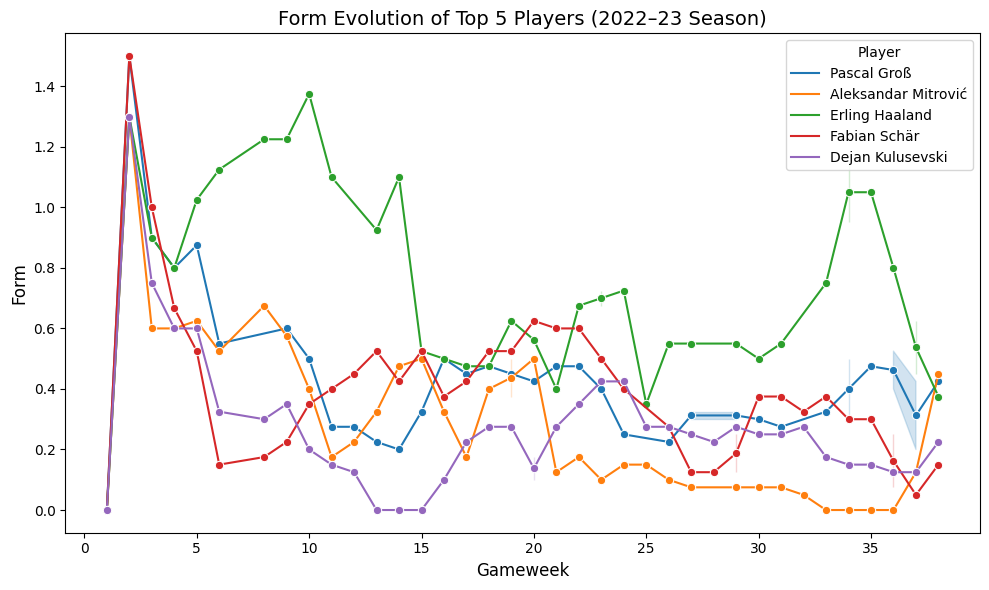

In [102]:
# Plot form evolution
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=top_players_df,
    x='GW',
    y='form',
    hue='name',
    marker='o'
)


plt.title('Form Evolution of Top 5 Players (2022–23 Season)', fontsize=14)
plt.xlabel('Gameweek', fontsize=12)
plt.ylabel('Form', fontsize=12)
plt.legend(title='Player')
plt.tight_layout()
plt.show()


In [103]:
season_df['total_points'] = pd.to_numeric(season_df['total_points'], errors='coerce')

# DataFrame of each player's highest total points (no duplicates)
top_points_df = (
    season_df.groupby('name', as_index=False)['total_points']
    .max()
    .sort_values('total_points', ascending=False)
    .reset_index(drop=True)
)

top_points_df.head(10)

,name,total_points
0,Erling Haaland,272
1,Harry Kane,263
2,Mohamed Salah,239
3,Martin Ødegaard,212
4,Marcus Rashford,205
5,Bukayo Saka,202
6,Kieran Trippier,198
7,Gabriel Martinelli Silva,198
8,Kevin De Bruyne,183
9,Ivan Toney,182


In [104]:
# Top 5 players based on their highest total points
top_players = (
    season_df.groupby('name')['total_points'].max()
    .reset_index()
    .sort_values('total_points', ascending=False)
    .drop_duplicates(subset=['name'])
    .head(5)
)

# Filter data for these top 5 players
top_players_df = season_df[season_df['name'].isin(top_players['name'])]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

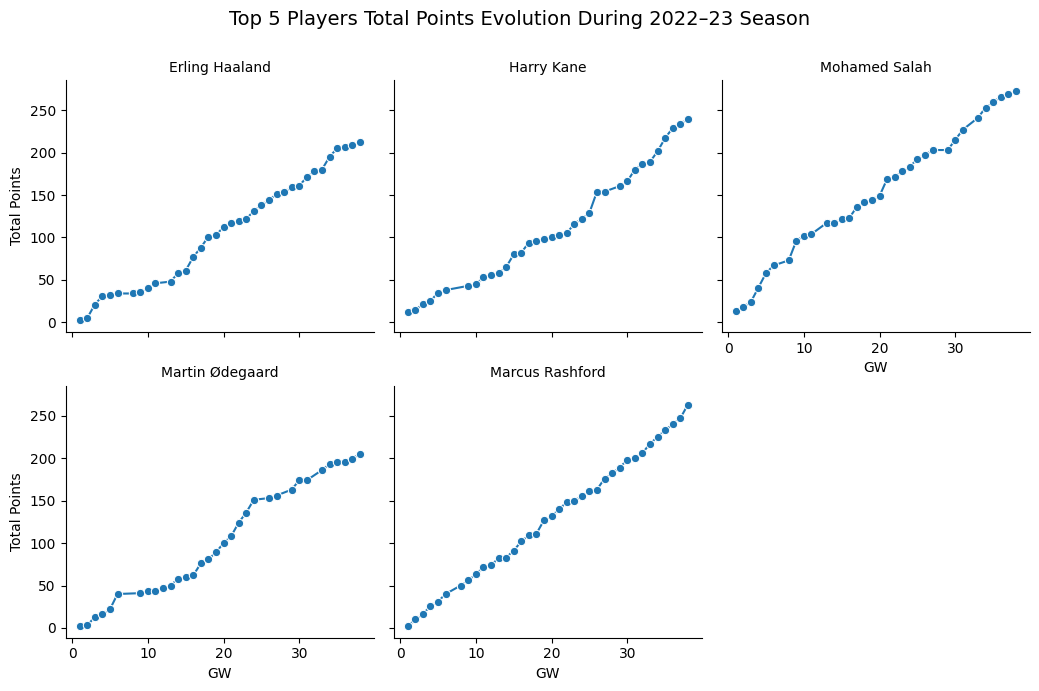

In [105]:
# FacetGrid: one subplot per player
g = sns.FacetGrid(
    top_players_df,
    col='name',
    col_wrap=3,
    height=3.5,
    sharey=True,
    sharex=True
)
g.map_dataframe(sns.lineplot, x='GW', y='total_points', marker='o', color='#1f77b4')

for ax, name in zip(g.axes.flat, top_players['name']):
    ax.set_title(name, fontsize=10)
    ax.set_xlabel("GW")
    ax.set_ylabel("Total Points")

plt.subplots_adjust(top=0.88)
g.fig.suptitle('Top 5 Players Total Points Evolution During 2022–23 Season', fontsize=14)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

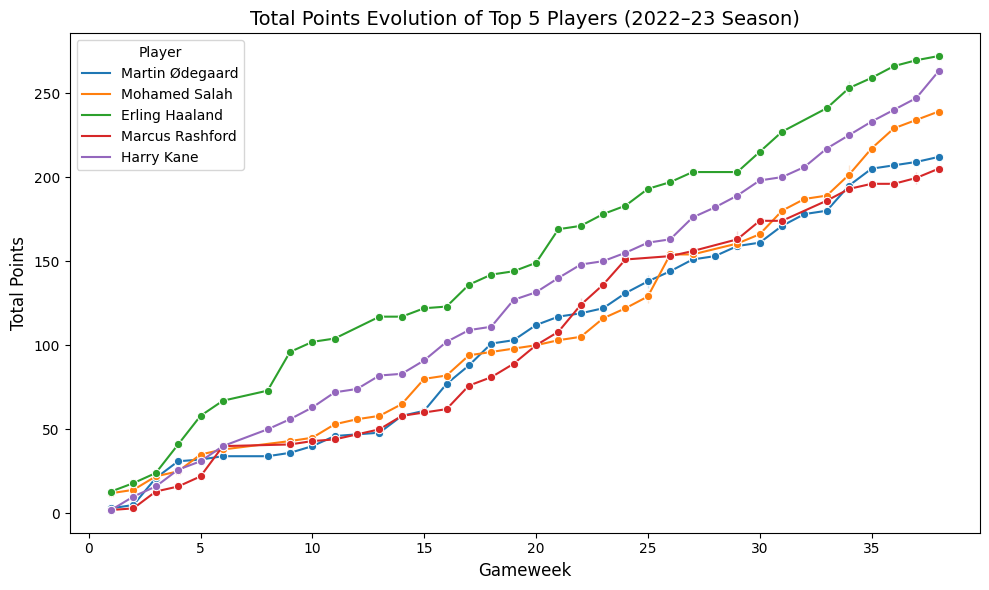

In [106]:
# Combined plot for all top 5 players
plt.figure(figsize=(10,6))
sns.lineplot(
    data=top_players_df,
    x='GW',
    y='total_points',
    hue='name',
    marker='o'
)

plt.title('Total Points Evolution of Top 5 Players (2022–23 Season)', fontsize=14)
plt.xlabel('Gameweek', fontsize=12)
plt.ylabel('Total Points', fontsize=12)
plt.legend(title='Player')
plt.tight_layout()
plt.show()

## Comparing Top Players by Form vs Total Points

This section investigates whether players with the **highest form** also rank among those with the **highest total points**.  
A Venn diagram visually compares the top 5 players in each category, revealing overlaps and differences between short-term form and cumulative performance.

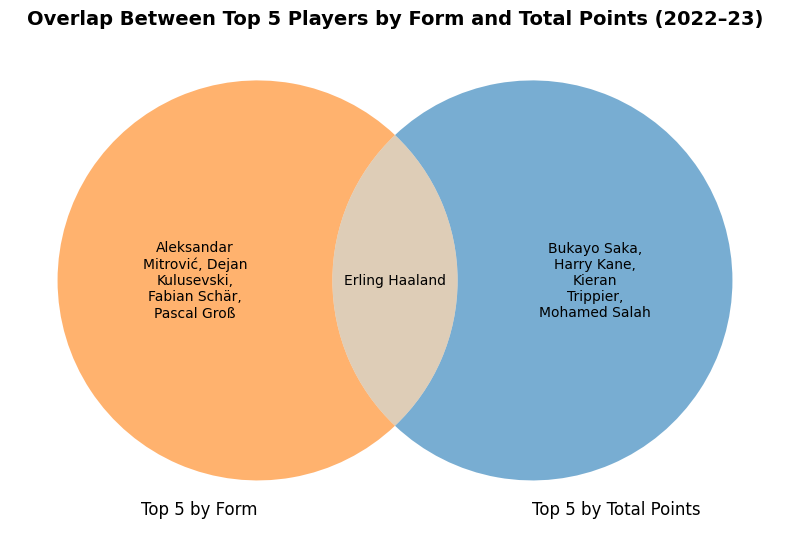

In [115]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import textwrap

# Define sets
form_set = set(top_forms_df.head(5)['name'])
points_set = set(
    season_df.groupby('name', as_index=False)['total_points']
    .sum()
    .sort_values('total_points', ascending=False)
    .drop_duplicates(subset=['name'])
    .head(5)['name']
)

# Helper function for wrapping names dynamically
def wrap_names(names, width=15):
    return "\n".join(textwrap.wrap(", ".join(sorted(names)), width=width))

# Plot Venn diagram
plt.figure(figsize=(8,7))
v = venn2(
    [form_set, points_set],
    set_labels=('Top 5 by Form', 'Top 5 by Total Points'),
    set_colors=("#FF7F0E", "#1F77B4"),
    alpha=0.6
)

# Add wrapped player names dynamically
if v.get_label_by_id('10'):
    v.get_label_by_id('10').set_text(wrap_names(form_set - points_set))
if v.get_label_by_id('01'):
    v.get_label_by_id('01').set_text(wrap_names(points_set - form_set))
if v.get_label_by_id('11'):
    v.get_label_by_id('11').set_text(wrap_names(form_set & points_set))

# Title and style
plt.title('Overlap Between Top 5 Players by Form and Total Points (2022–23)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
